# Table of Contents:
1. Import Libraries, Define Path
2. Import Files and Describe
3. Data Wrangling
4. Data Prep for Regression Analysis
5. State Hypothesis
6. Reshape Variables and Create Test and Training Sets
7. Regression Analysis

# 1. Import Libraries, Define Path

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# define path
path = r'C:\Users\heidi\Desktop\Analyses\A6 Data Project'

# 2. Import Files and Describe

In [2]:
real = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'real.4.30.22.csv'))
real.head(15)

,Unnamed: 0,state,city,type,lat,lng,pop,male_pop,female_pop,rent_mean,income_mean,mort_exp_mean,expenses_mean,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,female_age_mean,pct_own,rent_cost
0,0,Alaska,Unalaska,City,53.621091,-166.770979,4619,2725,1894,1366.24657,107394.63090,2266.22562,840.67205,0.82841,0.82784,0.82940,38.45838,32.78177,0.25053,medium
1,1,Alaska,Eagle River,City,61.174250,-149.284329,3727,1780,1947,2347.69441,136547.39120,2485.10777,712.33066,0.94090,0.97253,0.91503,37.26216,38.97956,0.94989,high
2,2,Alaska,Jber,City,61.284745,-149.653973,8736,5166,3570,2071.30766,69361.23167,NaN,525.89101,0.99097,0.99661,0.98408,21.96291,22.20427,0.00759,high
3,3,Alaska,Anchorage,City,61.229560,-149.893037,1941,892,1049,943.79086,66790.89936,2289.79186,491.86501,0.89274,0.94301,0.84871,35.81912,37.00750,0.20247,medium
4,4,Alaska,Anchorage,City,61.217082,-149.767214,5981,3076,2905,1372.84472,76752.81635,1904.16410,681.80199,0.95351,0.96060,0.94669,34.13110,34.96611,0.56936,medium
5,5,Alaska,Anchorage,City,61.217507,-149.744426,5476,2916,2560,1351.27532,81877.97542,2060.45716,667.73315,0.87941,0.90837,0.84932,29.23608,33.63770,0.45011,medium
6,6,Alaska,Anchorage,City,61.223372,-149.723327,5893,3037,2856,1022.91322,65167.78407,1868.62879,511.26360,0.86077,0.88176,0.83415,36.01941,34.54987,0.51995,medium
7,7,Alaska,Anchorage,City,61.216701,-149.792744,7481,3766,3715,1101.88070,65639.50913,1802.36077,731.57153,0.87654,0.88350,0.86952,30.85796,31.90301,0.52659,medium
8,8,Alaska,Anchorage,City,61.215067,-149.836271,5501,3139,2362,884.61089,52556.63645,1939.95113,562.66116,0.79679,0.77843,0.82344,31.35271,30.84458,0.33319,medium
9,9,Alaska,Anchorage,City,61.204383,-149.852526,3225,1565,1660,991.76412,70388.07608,1728.23462,633.92151,0.85196,0.89312,0.81628,38.86716,43.54596,0.38822,medium


In [3]:
#drop unneeded columns
real.drop(columns = ['Unnamed: 0'], inplace = True)
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             39030 non-null  object 
 1   city              39030 non-null  object 
 2   type              39030 non-null  object 
 3   lat               39030 non-null  float64
 4   lng               39030 non-null  float64
 5   pop               39030 non-null  int64  
 6   male_pop          39030 non-null  int64  
 7   female_pop        39030 non-null  int64  
 8   rent_mean         38568 non-null  float64
 9   income_mean       38640 non-null  float64
 10  mort_exp_mean     38189 non-null  float64
 11  expenses_mean     38140 non-null  float64
 12  hs_degree         38755 non-null  float64
 13  hs_degree_male    38741 non-null  float64
 14  hs_degree_female  38702 non-null  float64
 15  male_age_mean     38757 non-null  float64
 16  female_age_mean   38728 non-null  float6

In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 3. Data Wrangling

In [5]:
# Check for missing values

real.isnull().sum()

state                 0
city                  0
type                  0
lat                   0
lng                   0
pop                   0
male_pop              0
female_pop            0
rent_mean           462
income_mean         390
mort_exp_mean       841
expenses_mean       890
hs_degree           275
hs_degree_male      289
hs_degree_female    328
male_age_mean       273
female_age_mean     302
pct_own             390
rent_cost           462
dtype: int64

In [8]:
# Impute missing values with mean

real['rent_mean'].fillna(real['rent_mean'].mean(), inplace=True)
real['income_mean'].fillna(real['income_mean'].mean(), inplace=True)
real['mort_exp_mean'].fillna(real['mort_exp_mean'].mean(), inplace=True)
real['expenses_mean'].fillna(real['expenses_mean'].mean(), inplace=True)
real['hs_degree'].fillna(real['hs_degree'].mean(), inplace=True)
real['hs_degree_male'].fillna(real['hs_degree_male'].mean(), inplace=True)
real['hs_degree_female'].fillna(real['hs_degree_female'].mean(), inplace=True)
real['male_age_mean'].fillna(real['male_age_mean'].mean(), inplace=True)
real['female_age_mean'].fillna(real['female_age_mean'].mean(), inplace=True)
real['pct_own'].fillna(real['pct_own'].mean(), inplace=True)

real.isnull().sum() #check the output

state                 0
city                  0
type                  0
lat                   0
lng                   0
pop                   0
male_pop              0
female_pop            0
rent_mean             0
income_mean           0
mort_exp_mean         0
expenses_mean         0
hs_degree             0
hs_degree_male        0
hs_degree_female      0
male_age_mean         0
female_age_mean       0
pct_own               0
rent_cost           462
dtype: int64

Leaving rent_cost with missing values as this is a flag

In [13]:
# check for duplicates
dups = real.duplicated()
dups.shape # no dups

(39030,)

<AxesSubplot:xlabel='hs_degree_male', ylabel='Count'>

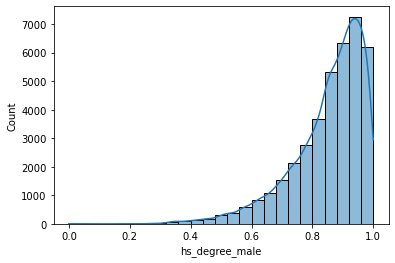

In [18]:
# check for extreme values
sns.histplot(real['hs_degree_male'], bins=25, kde=True)

<AxesSubplot:xlabel='hs_degree_female', ylabel='Count'>

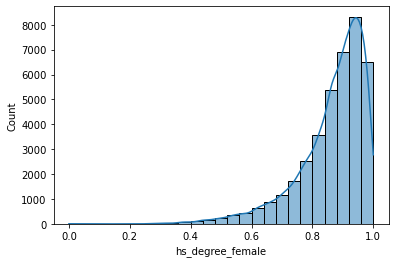

In [19]:
# check for extreme values
sns.histplot(real['hs_degree_female'], bins=25, kde=True)

<AxesSubplot:xlabel='income_mean', ylabel='Count'>

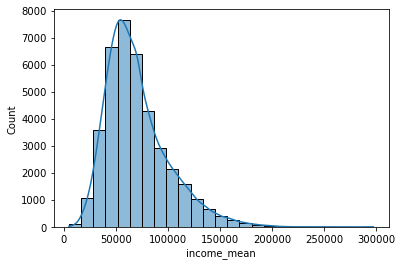

In [20]:
# check for extreme values
sns.histplot(real['income_mean'], bins=25, kde=True)

<AxesSubplot:xlabel='female_age_mean', ylabel='Count'>

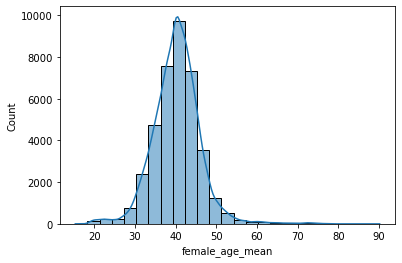

In [21]:
# check for extreme values
sns.histplot(real['female_age_mean'], bins=25, kde=True)

<AxesSubplot:xlabel='male_age_mean', ylabel='Count'>

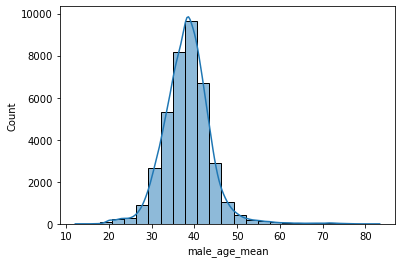

In [22]:
# check for extreme values
sns.histplot(real['male_age_mean'], bins=25, kde=True)

We have no true extreme values, likely because these are already presented as the mean values and the extremes have already been flattened.

# 4. Data Prep for Regression Analysis

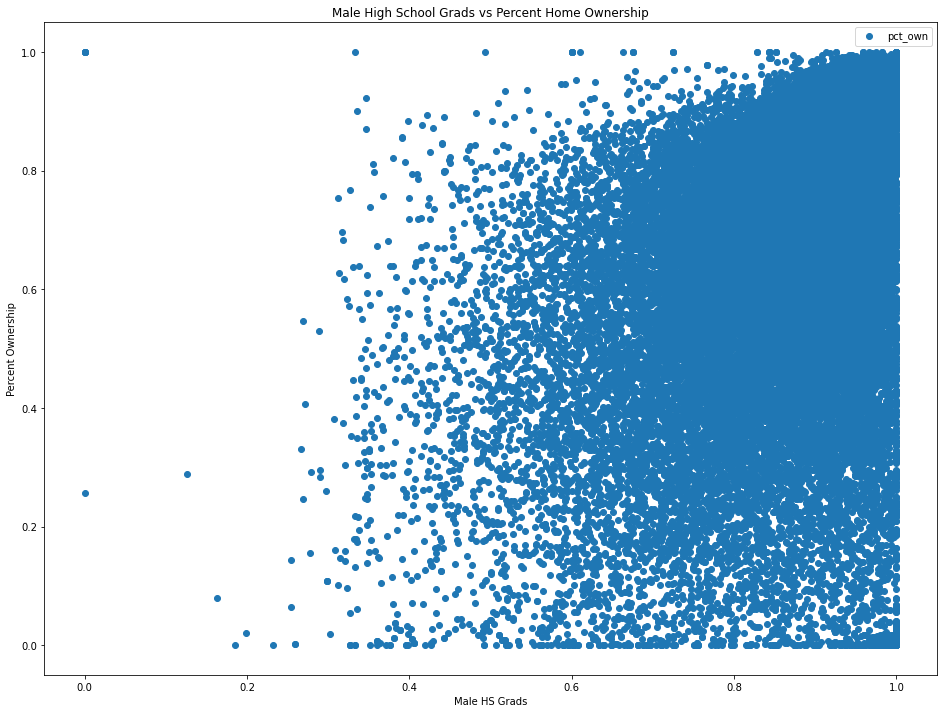

In [36]:
# create scatterplot to visualize our variables
plt.rcParams["figure.figsize"] = (16,12)
real.plot(x='hs_degree_male', y='pct_own',style='o')
plt.title('Male High School Grads vs Percent Home Ownership')  
plt.xlabel('Male HS Grads')  
plt.ylabel('Percent Ownership')  
plt.show()

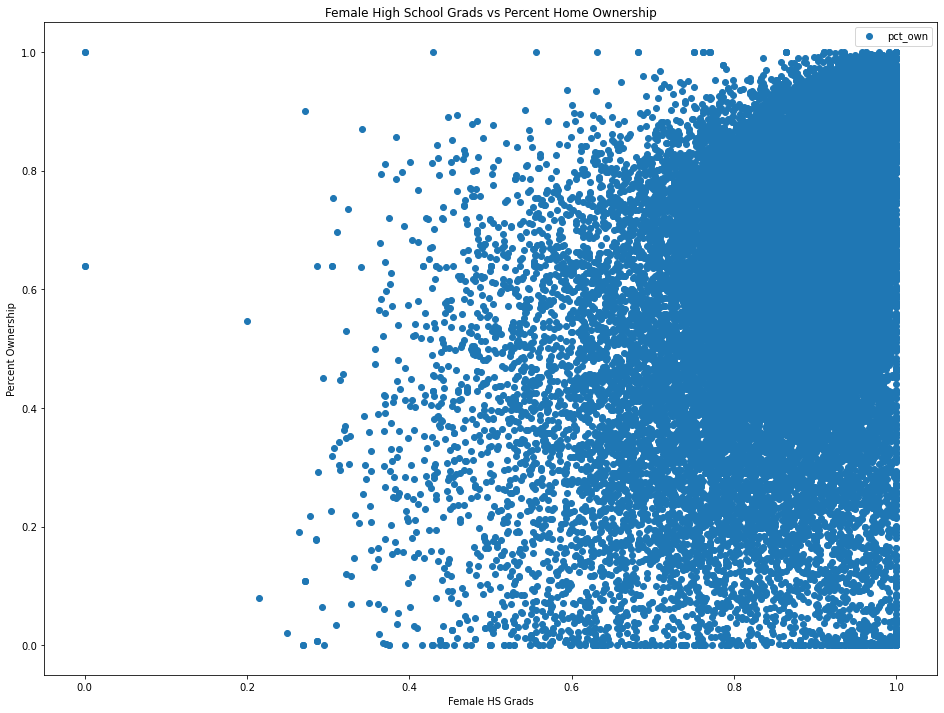

In [37]:
# create scatterplot to visualize our variables
plt.rcParams["figure.figsize"] = (16,12)
real.plot(x='hs_degree_female', y='pct_own',style='o')
plt.title('Female High School Grads vs Percent Home Ownership')  
plt.xlabel('Female HS Grads')  
plt.ylabel('Percent Ownership')  
plt.show()

There does not appear to be a huge difference between male and female high school graduates and percent home ownership.

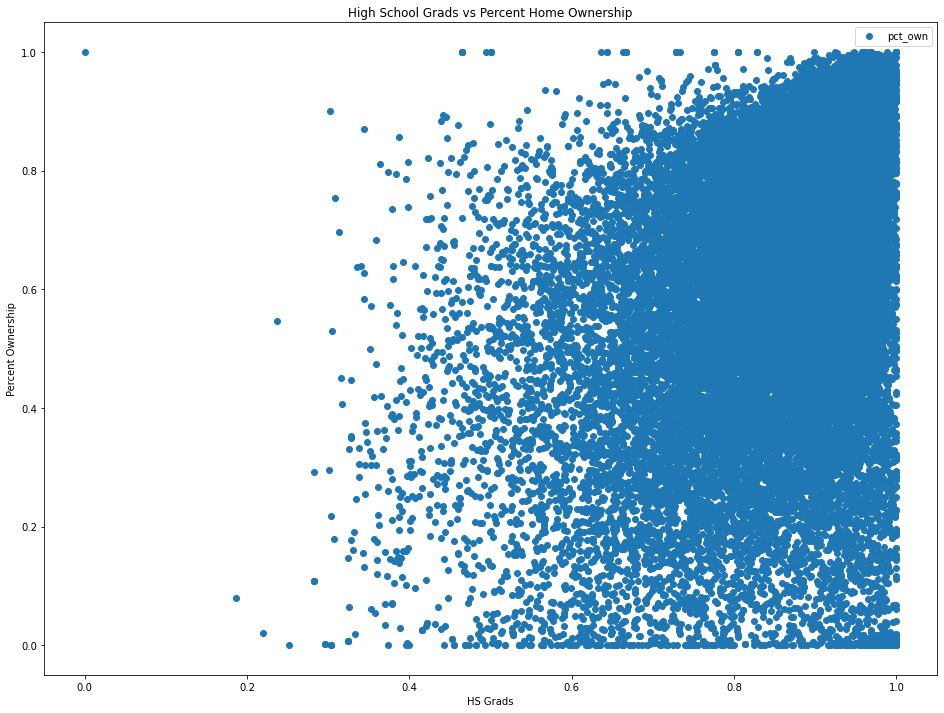

In [38]:
# create scatterplot to visualize our variables
plt.rcParams["figure.figsize"] = (16,12)
real.plot(x='hs_degree', y='pct_own',style='o')
plt.title('High School Grads vs Percent Home Ownership')  
plt.xlabel('HS Grads')  
plt.ylabel('Percent Ownership')  
plt.show()

# 5. State Hypothesis

Where there are more male population and a higher percentage of high school diplomas, there will be a higher percentage of home ownership. As there are no significant difference between the genders in this case, we can proceed with total high school graduates. Restated hypothesis: higher percentage of high school graduates in a given area will mean that there will be a higher percentage of home ownership per given area.

# 6. Reshape Variables and Create Test and Training Sets

In [39]:
# reshape variables into NumPy arrays with X being the indepdent variable and y being the dependent variable
X = real['hs_degree'].values.reshape(-1,1)
y = real['pct_own'].values.reshape(-1,1)

In [40]:
X

array([[0.82841],
       [0.9409 ],
       [0.99097],
       ...,
       [0.84651],
       [0.90238],
       [0.85732]])

In [41]:
y

array([[0.25053],
       [0.94989],
       [0.00759],
       ...,
       [0.68378],
       [0.8245 ],
       [0.813  ]])

In [42]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 7. Regression Analysis

In [43]:
# Create a regression object.

regression = LinearRegression()

In [44]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

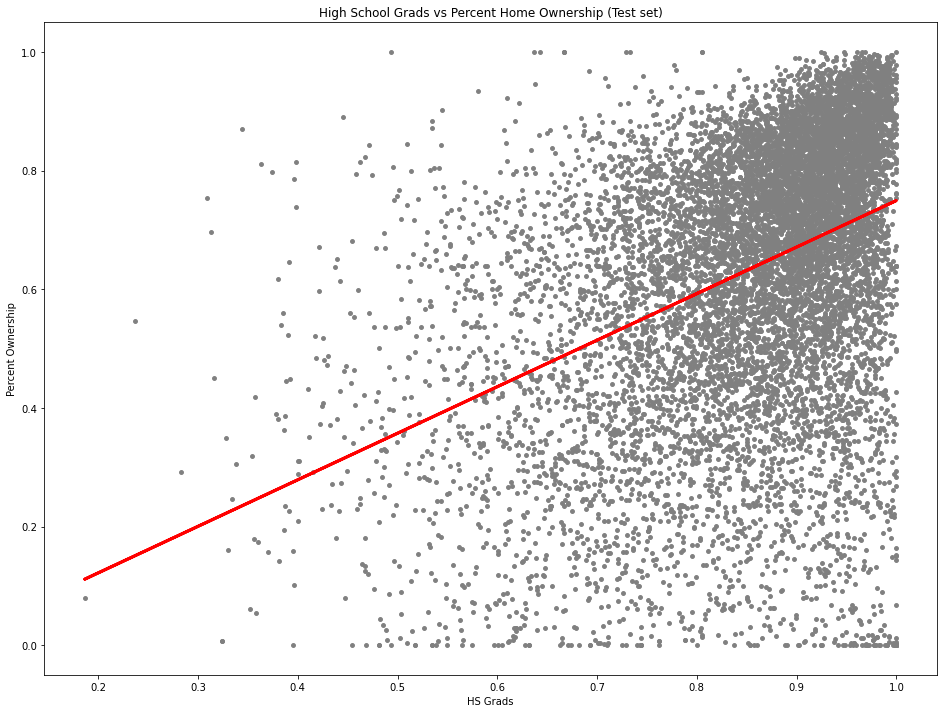

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('High School Grads vs Percent Home Ownership (Test set)')
plot_test.xlabel('HS Grads')
plot_test.ylabel('Percent Ownership')
plot_test.show()

Overall, it follows the majority clumped on the right side, closer to 100% graduation rate with a higher percentage of home ownership, but there's a lot of room for renters with high school degrees and owners without high school degrees.

In [47]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [48]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.78489438]]
Mean squared error:  0.04351129559137365
R2 score:  0.16163985056524366


In [49]:
y_predicted

array([[0.58480363],
       [0.72230927],
       [0.67201324],
       ...,
       [0.70367588],
       [0.60080762],
       [0.65242228]])

In [50]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.647020,0.584804
1,0.857520,0.722309
2,0.708290,0.672013
3,0.813660,0.673300
4,0.559380,0.600023
5,0.825300,0.635060
6,0.739300,0.548047
7,0.758270,0.715426
8,0.448120,0.696573
9,0.462310,0.573054


Some of these are better than others, more likely this is a multi-faceted hypothesis that needs more information than high school graduation rates. We also need to know college graduation rates, industry, and population and distance of the nearest city.

In [51]:
# Compare against training set

y_predicted_train = regression.predict(X_train)

In [52]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.78489438]]
Mean squared error:  0.0437190050309453
R2 score:  0.15107072272820854


Test Results:
Slope: [[0.78489438]]
Mean squared error:  0.04351129559137365
R2 score:  0.16163985056524366

These actually hold up pretty well as a model, we're not overfitted.

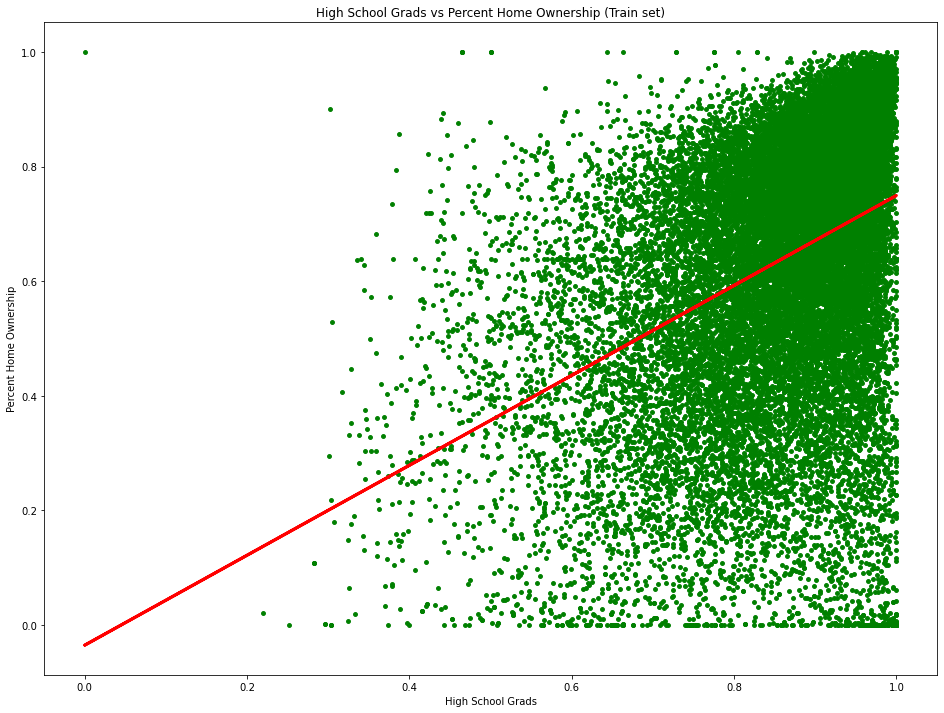

In [54]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('High School Grads vs Percent Home Ownership (Train set)')
plot_test.xlabel('High School Grads')
plot_test.ylabel('Percent Home Ownership')
plot_test.show()

In [55]:
#export to csv
real.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'real.5.1.22.csv'))